#  Classification, Parameter Tuning,  Model Deployment



## Import Packages

In [109]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Prepare Data

In [110]:
df_org = pd.read_csv("drug200.csv")
df_org.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [111]:
df = df_org.copy()

## Handle Missing Data 

In [112]:
df.isna().sum()/len(df)*100

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [114]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


## Categotical Encoding

In [115]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [116]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [117]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [118]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [119]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [120]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# sex_encoder = LabelEncoder().fit(['F', 'M'])
sex_encoder = LabelEncoder().fit(df['Sex'])

# bp_encoder = LabelEncoder().fit(['HIGH', 'LOW', 'NORMAL'])
bp_encoder = LabelEncoder().fit(df['BP'])

# cholesterol_encoder = LabelEncoder().fit(['HIGH', 'NORMAL'])
cholesterol_encoder = LabelEncoder().fit(df['Cholesterol'])

# drug_encoder = LabelEncoder().fit(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
drug_encoder = LabelEncoder().fit(df['Drug'])

In [121]:
sex_encoder.classes_

array(['F', 'M'], dtype=object)

In [122]:
bp_encoder.classes_

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [123]:
cholesterol_encoder.classes_

array(['HIGH', 'NORMAL'], dtype=object)

In [124]:
drug_encoder.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [125]:
#Encode categorical features
df['Sex'] = sex_encoder.transform(df['Sex'])
df['BP'] = bp_encoder.transform(df['BP'])
df['Cholesterol']= cholesterol_encoder.transform(df['Cholesterol'])
df['Drug']= drug_encoder.transform(df['Drug'])

## Train/Test Data Split 

In [126]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [127]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [128]:
y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int32

In [129]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using Logistic Regression

### Grid Search

In [130]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000))
])

# Define the parameter grid
param_grid = {
    'model__solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV object with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred_best = grid_search.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Model: ", accuracy_best)


Best Parameters:  {'model__C': 100, 'model__solver': 'lbfgs'}
Best Accuracy:  0.94375
Test Accuracy with Best Model:  0.975


### Use the Best Parameter

In [131]:
# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', LogisticRegression(max_iter=10000,C=100,solver='lbfgs'))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])

## Testing / Evaluation

              precision    recall  f1-score   support

           0     1.0000    0.9333    0.9655        15
           1     0.8571    1.0000    0.9231         6
           2     1.0000    1.0000    1.0000         3
           3     1.0000    1.0000    1.0000         5
           4     1.0000    1.0000    1.0000        11

    accuracy                         0.9750        40
   macro avg     0.9714    0.9867    0.9777        40
weighted avg     0.9786    0.9750    0.9755        40

Logistic Regression accuracy is: 97.50%


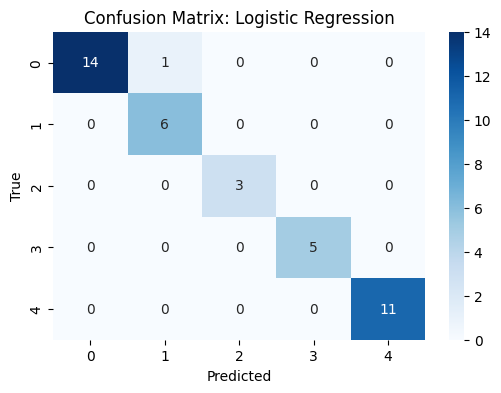

In [132]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4, zero_division=1)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(KNAcc*100))

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_logistic.png')

plt.show()

## Save Model and etc.

In [133]:
# Create a tuple or any container object with your variables
data_to_save = (model, drug_encoder, sex_encoder, bp_encoder, cholesterol_encoder)

# Open a file in binary write mode
with open('logistic_drug_model.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [134]:
import pickle
import pandas as pd

### Load model

In [135]:
with open('logistic_drug_model.pkl', 'rb') as file:
    # Load the data from the file
    model, drug_encoder, sex_encoder, bp_encoder, cholesterol_encoder = pickle.load(file)

### New data

In [136]:
x_new =  pd.DataFrame() 
x_new['Age'] = [51]
x_new['Sex'] = ['M']
x_new['BP'] = ['HIGH']
x_new['Cholesterol'] = ['NORMAL']
x_new['Na_to_K'] = [11.343]

### Categorical Data Encoding

In [137]:
x_new['Sex'] = sex_encoder.transform(x_new['Sex'])
x_new['BP'] = bp_encoder.transform(x_new['BP'])
x_new['Cholesterol'] = cholesterol_encoder.transform(x_new['Cholesterol'])

### Predicting

In [138]:
y_pred_new = model.predict(x_new)

result = drug_encoder.inverse_transform(y_pred_new) 

print('Predicted drug type: ', result)

Predicted drug type:  ['drugB']
